#Get Historical Data function

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.1 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd 
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

def get_Historical_Data(tickers): 
  #function takes in a list 
  #returns a DataFrame with adjusted closing information

    #initialising data
    data = pd.DataFrame()
    names = list()

    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 4, 24), end=datetime(2021, 4, 24)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

tickerz = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","TWTR","GS","XOM","NKE", "FB","BRK-B", "MSFT"]
d = get_Historical_Data(tickerz)
print(d.columns)
print(d.head(30))
d.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,FB,BRK-B,MSFT
Date,,,,,,,,,,,,,,,,
2020-04-24,362.056976,69.783592,1279.310059,56.180000,4.77,275.740387,424.989990,128.979996,125.876289,28.740000,170.894012,38.273399,87.123543,190.070007,186.520004,171.397949
2020-04-27,356.871948,69.832924,1275.880005,56.490002,5.82,279.716064,421.380005,128.679993,124.767670,30.000000,177.208405,38.457195,88.109444,187.500000,187.460007,170.907013
2020-04-28,350.937714,68.700958,1233.670044,55.509998,5.64,278.429840,403.829987,131.300003,124.475914,28.790001,180.558701,39.358673,87.547478,182.910004,187.119995,166.743546
2020-04-29,356.852173,70.957458,1341.479980,53.660000,6.04,285.718689,411.890015,139.000000,120.197067,31.090000,183.474503,41.537975,86.827774,194.190002,189.610001,174.225937
2020-04-30,356.773285,72.454384,1348.660034,52.389999,5.73,283.058472,419.850006,141.020004,118.203506,28.680000,177.092560,40.671505,85.950317,204.710007,187.360001,175.973816


#Correlation Matrix

In [ ]:
corr_matrix = d.corr()
corr_matrix


,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,FB,BRK-B,MSFT
DPZ,1.000000,0.215169,-0.207342,0.265336,-0.363020,-0.043568,0.189883,-0.195480,0.335647,-0.178380,-0.339183,-0.553837,0.024097,0.306881,-0.072372,0.049852
AAPL,0.215169,1.000000,0.765563,0.918794,0.449900,0.897570,0.861139,0.649297,0.798448,0.759015,0.673259,0.250475,0.889708,0.860028,0.840687,0.868948
GOOG,-0.207342,0.765563,1.000000,0.585081,0.743687,0.950758,0.715588,0.844313,0.497455,0.924865,0.933780,0.720093,0.775796,0.737040,0.925402,0.925449
AMD,0.265336,0.918794,0.585081,1.000000,0.243387,0.760382,0.736988,0.492571,0.864122,0.624265,0.488650,0.053716,0.849127,0.755683,0.725688,0.672401
GME,-0.363020,0.449900,0.743687,0.243387,1.000000,0.679289,0.428684,0.663475,0.116061,0.704470,0.801194,0.746583,0.479506,0.438879,0.704577,0.672505
SPY,-0.043568,0.897570,0.950758,0.760382,0.679289,1.000000,0.792810,0.860000,0.652183,0.916591,0.906785,0.594242,0.890021,0.823235,0.968450,0.939998
NFLX,0.189883,0.861139,0.715588,0.736988,0.428684,0.792810,1.000000,0.563172,0.635886,0.724582,0.628058,0.275218,0.721957,0.742170,0.700613,0.859247
BA,-0.195480,0.649297,0.844313,0.492571,0.663475,0.860000,0.563172,1.000000,0.381063,0.792784,0.872979,0.732941,0.717081,0.644235,0.824197,0.766547
WMT,0.335647,0.798448,0.497455,0.864122,0.116061,0.652183,0.635886,0.381063,1.000000,0.475323,0.339739,-0.137751,0.795766,0.706721,0.620749,0.555514
TWTR,-0.178380,0.759015,0.924865,0.624265,0.704470,0.916591,0.724582,0.792784,0.475323,1.000000,0.907607,0.659845,0.822042,0.690320,0.907169,0.877524


#Create a heat map matrix for the correlation

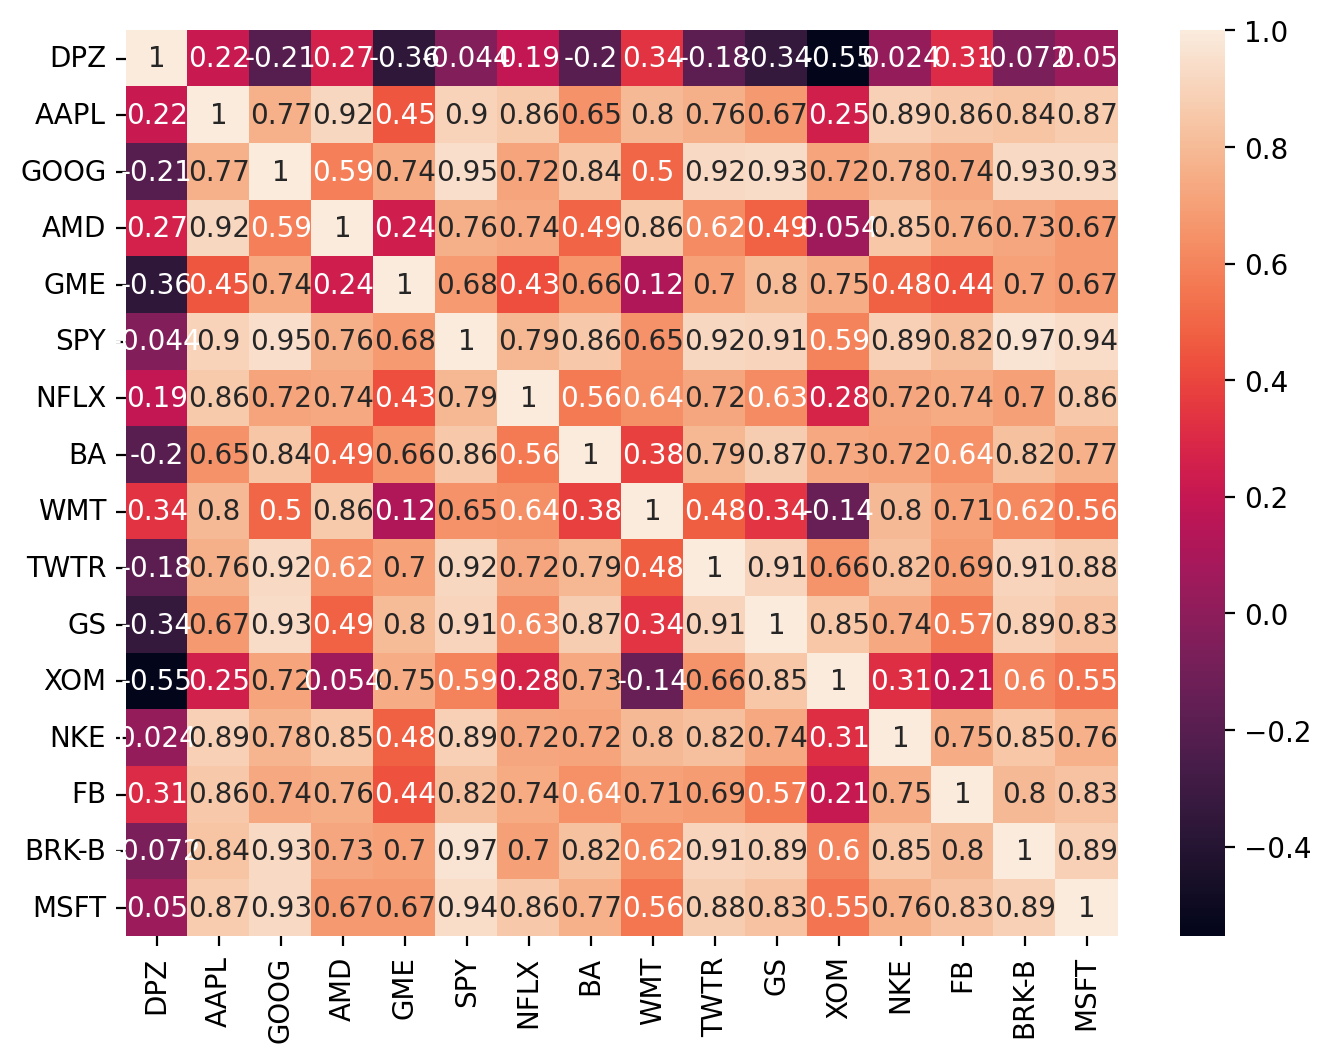

In [ ]:
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8,6), dpi=200)
sn.heatmap(corr_matrix, annot=True)


We select a high correlation pair... in this case I select SPY and GOOG, with a correlation value of 0.98, which is considered to be high.

I would like to normalise the stocks so that they can be compared on a chart..

The normalisation is done using the Sklearn package... preprocessing

Text(0.5, 1.0, 'Historical Adjusted Closing Price')

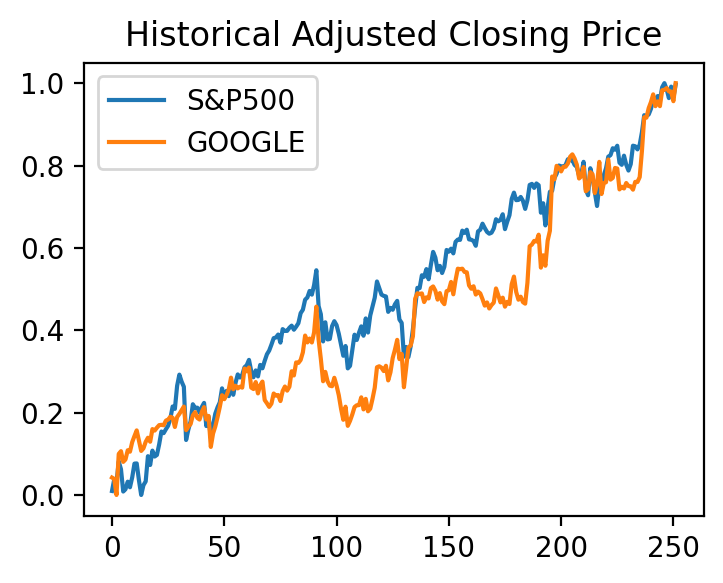

In [ ]:
from sklearn import preprocessing

SPY = d['SPY'].values
min_max_scaler = preprocessing.MinMaxScaler()
SPY_scaled = min_max_scaler.fit_transform(SPY.reshape(-1,1))
df1 = pd.DataFrame(SPY_scaled)

GOOG = d['GOOG'].values
GOOG_scaled = min_max_scaler.fit_transform(GOOG.reshape(-1,1))
df2 = pd.DataFrame(GOOG_scaled)

#verify the relationship between these stocks
figure(figsize=(4, 3), dpi=200)
plt.plot(df1, label="S&P500")
plt.plot(df2, label="GOOGLE")
plt.legend()
plt.title('Historical Adjusted Closing Price')

In [ ]:
#define some DataFrames for different stocks
BRK = d['BRK-B']
MSFT = d['MSFT']
DPZ = d['DPZ']
WMT = d['WMT']
NFLX = d['NFLX']
AMD = d['AMD']
AAPL = d['AAPL']
BA = d['BA']
FB = d['FB']
print(type(SPY))

<class 'numpy.ndarray'>


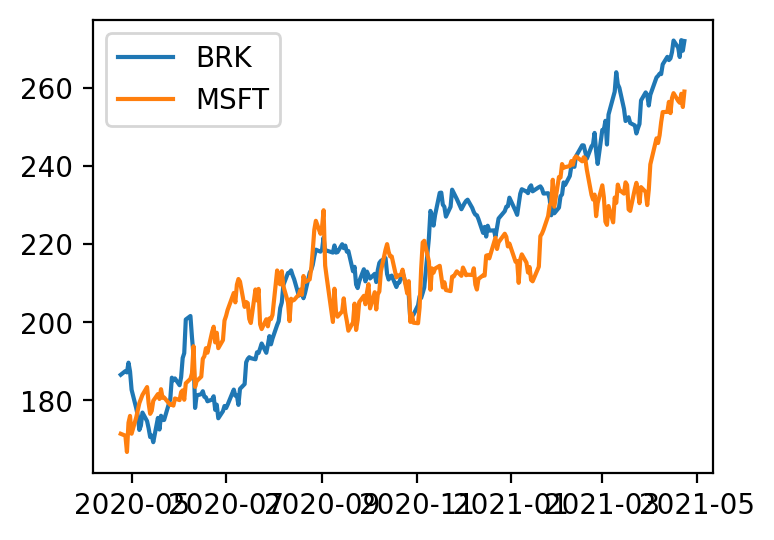

In [ ]:
figure(figsize=(4, 3), dpi=200)
plt.plot(BRK, label='BRK')
plt.plot(MSFT, label='MSFT')
plt.legend()

It is noticeably clear that the prices on the first day are very close to one another for **MSFT** and **BRK-B**, removing the need to normalise the data as the stocks can be compared straight away without needing any adjusting. 

There are more intersections between Berkshire and Microsoft, than with the S&P500 and Google... let's test both and repeat each step for both pairs

Let's plot the spread and ratio for each pair...

Text(0.5, 1.0, 'Spread between MSFT and BRK')

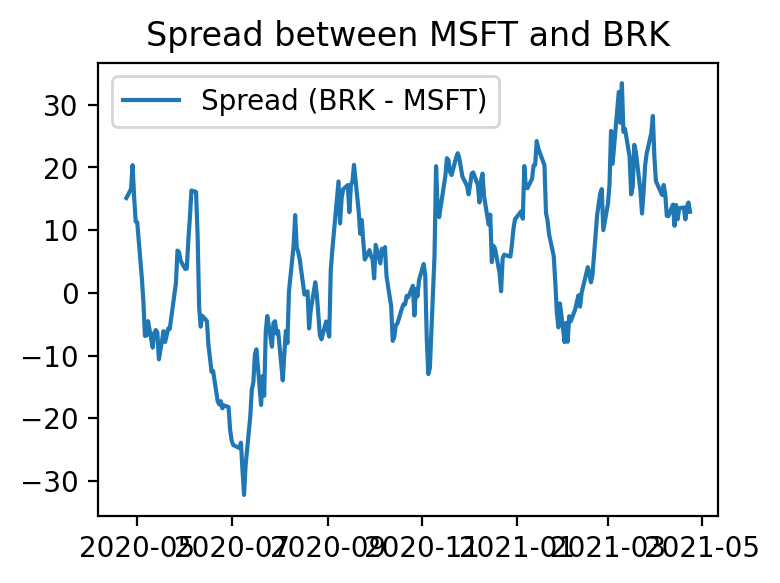

In [ ]:
figure(figsize=(4,3), dpi=200)
plt.plot(BRK - MSFT, label='Spread (BRK - MSFT)')
plt.legend()
plt.title("Spread between MSFT and BRK")


Text(0.5, 1.0, 'Spread between SPY and GOOG')

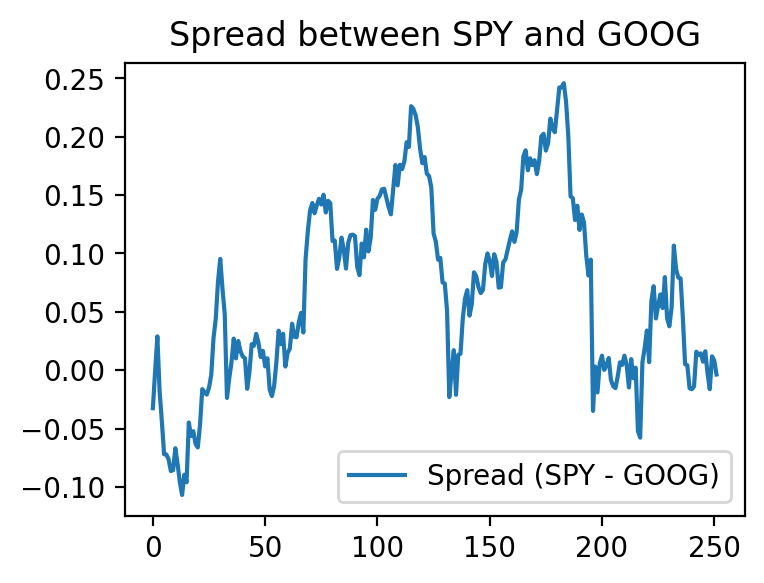

In [ ]:
figure(figsize=(4,3), dpi=200)
plt.plot(df1 - df2, label='Spread (SPY - GOOG)')
plt.legend()
plt.title("Spread between SPY and GOOG")

Text(0.5, 1.0, 'Ratio between BRK and MSFT')

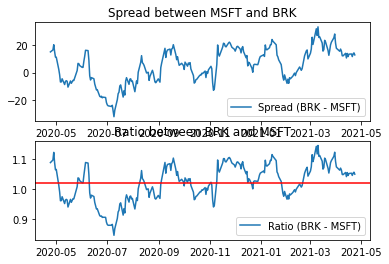

In [ ]:
#spread BRK - MSFT
plt.subplot(2,1,1)
plt.plot(BRK - MSFT, label='Spread (BRK - MSFT)')
plt.legend()
plt.title("Spread between MSFT and BRK")

#ratio BRK - MSFT 
plt.subplot(2,1,2)
ratio1 = BRK / MSFT
plt.plot(ratio1, label='Ratio (BRK - MSFT)')
plt.axhline(ratio1.mean(), color='red')
plt.legend()
plt.title("Ratio between BRK and MSFT")

Text(0.5, 1.0, 'Ratio between SPY and GOOG')

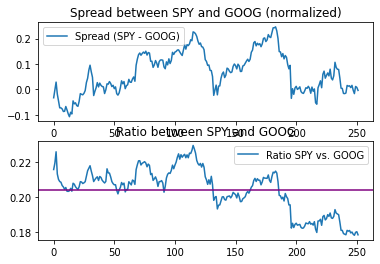

In [ ]:
#spread SPY - GOOG
plt.subplot(2,1,1)
plt.plot(df1 - df2, label='Spread (SPY - GOOG)')
plt.legend()
plt.title("Spread between SPY and GOOG (normalized)")

#ratio SPY - GOOG
plt.subplot(2,1,2)
ratio2 = SPY / GOOG
plt.plot(ratio2, label='Ratio SPY vs. GOOG')
plt.axhline(ratio2.mean(), color='purple')
plt.legend()
plt.title("Ratio between SPY and GOOG")

Let's perform multiple statistical tests... Such as the:



*   Cointegration test 
*   The AD Fuller Test (Augmented Dickey Fuller Test)

These tests are done to test the stationarity of the spread and the ratios between two stocks used for a Pairs Trading strategy. 

The two pairs used for this strategy are **SPY vs. GOOG**, as well as **MSFT vs. BRK**.



##Cointegration Test

The cointegration test is a technique used to find a correlation in a long term time series

This helps us determine whether the calculated spread or the ratio between two stocks is constant over time.

The Null Hypothesis means that the spreads or ratios are non-stationary over time.

In [ ]:
import statsmodels.tsa.stattools as ts
coint_result1 = ts.coint(BRK, MSFT)

coint_t_statistic1 = coint_result1[0]
p_val1 = coint_result1[1]
critical_val_test_statistic_1_5_10 = coint_result1[2]

print('The P val for BRK and MSFT stocks is ', p_val1)
if (p_val1 < 0.05):
  print('The Cointegration test is passed successfully')

else:
  print('The P value of the Cointegration test is too high')

The P val for BRK and MSFT stocks is  0.0648352781774246
The P value of the Cointegration test is too high


The Cointegration Test is repeated for the second pair:

**GOOG vs. SPY**

In [ ]:
coint_result2 = ts.coint(df1, df2)

coint_t_statistic2 = coint_result2[0]
p_val2 = coint_result2[1]
critical_val_test_statistic_1_5_10_2 = coint_result2[2]

print('The P val for BRK and MSFT stocks is ', p_val2)
if (p_val2 < 0.05):
  print('The Cointegration test is passed successfully')

else:
  print('The P value of the Cointegration test is too high')

The P val for BRK and MSFT stocks is  0.3881458679775073
The P value of the Cointegration test is too high


##Second method running a Cointegration Test

The cointegration test will be repeated for the first pair, **MSFT vs. BRK** as the value of the P value obtained is suspiciously high. 

In [ ]:
#Second way of running a Cointegration Test

##AD Fuller Test



The AD Fuller test is performed for the MSFT and BRK stocks, their spread and ratio.

In [ ]:
from statsmodels.tsa.stattools import adfuller
#the ADF test is performed for Berkshire Hathaway vs. Microsoft

BRK_ADF = adfuller(BRK)
print('the P value for the ADF test (BRK only) is: ', BRK_ADF[1]) #p value is selected using the index [1]
MSFT_ADF = adfuller(MSFT)
print('the P value for the ADF test (MSFT only) is: ', MSFT_ADF[1])
spread_MSFTBRK_ADF = adfuller(AMD - NFLX)
print(AMD - NFLX)
print('the P value of the MSFT vs. BRK spread is: ', spread_MSFTBRK_ADF[1])
ratio_MSFTBRK_ADF = adfuller(AMD / NFLX)
print('the P value for the BRK vs. MSFT ratio is: ', ratio_MSFTBRK_ADF[1])

the P value for the ADF test (BRK only) is:  0.907870918791454
the P value for the ADF test (MSFT only) is:  0.7145872326131513
Date
2020-04-24   -368.809990
2020-04-27   -364.890003
2020-04-28   -348.319988
2020-04-29   -358.230015
2020-04-30   -367.460007
                 ...    
2021-04-19   -473.330002
2021-04-20   -470.300011
2021-04-21   -427.289993
2021-04-22   -429.720001
2021-04-23   -422.789986
Length: 252, dtype: float64
the P value of the MSFT vs. BRK spread is:  0.00873742277220962
the P value for the BRK vs. MSFT ratio is:  0.5120190412050449


The individual stocks should not be stationary, and the P values of the AD Fuller tests show they are indeed not (0.907 for BRK and 0.714 for MSFT). Indeed, the stocks trend up and show no stationariaty as a result. 

However, the stationarity test worked for the spread and ratio of these two stocks.

_Note to self:_ the order of BRK and MSFT in the subtraction and the ratio do not impact results.

The AD Fuller is then performed on the SPY vs. GOOG pair 

In [ ]:
from statsmodels.tsa.stattools import adfuller
#the ADF test is performed for S&P500 vs. Google

SPY_ADF = adfuller(SPY)
print('the P value for the ADF test (SPY only) is: ', SPY_ADF[1]) #p value is selected using the index [1]
GOOG_ADF = adfuller(GOOG)
print('the P value for the ADF test (GOOG only) is: ', GOOG_ADF[1])
spread_SPY_GOOG_ADF = adfuller(SPY - GOOG)
print('the P value of the SPY vs. GOOG spread is: ', spread_SPY_GOOG_ADF[1])
ratio_SPY_GOOG_ADF = adfuller(SPY / GOOG)
print('the P value for the SPY vs. GOOG ratio is: ', ratio_SPY_GOOG_ADF[1])

the P value for the ADF test (SPY only) is:  0.843641799266297
the P value for the ADF test (GOOG only) is:  0.9713174994865252
the P value of the SPY vs. GOOG spread is:  0.9687687392583437
the P value for the SPY vs. GOOG ratio is:  0.6777507465110233


From our results, we have obtained the lowest and best value for the **Ratio of BRK vs. MSFT**.


This ratio is therefore what we will consider in the rest of this report. 

**IDEA:** write algorithm to find the best P value for any of the pairs for 16 stocks and find the time frame that is optimal.

##When to buy and when to sell? Let's find the Price Signals.

This will be done using the 'Z score', which is a statistical way to identify price singals.

The Z-score is plotted against time below.

The Z-score is found by (x-mean)/standard deviation

In the second part of the code cell below, the rolling mean is used instead of the mean. I will look at whether this makes any difference later

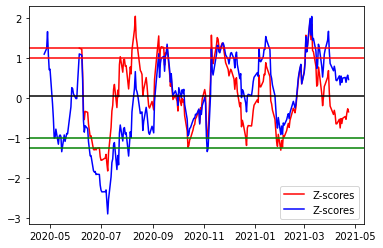

In [ ]:
#create a Simple Moving Average (MA) and apply to the Ratio R(t)...
rolmean = ratio1.rolling(window=30).mean()

zscore = (ratio1 - rolmean) / ratio1.std() #z-score definition
#plot the z-score using a 30-day rolling mean
plt.plot(zscore, label="Z-scores", color='red')

zscore2 = (ratio1 - ratio1.mean()) / ratio1.std()
#plot the z-score using a simple total mean
plt.plot(zscore2, label="Z-scores", color='blue')

#plot some horizontal key levels and mean
plt.axhline(zscore.mean(), color='black')
plt.axhline(1.0, color='red')
plt.axhline(1.25, color='red')
plt.axhline(-1.0, color='green')
plt.axhline(-1.25, color='green')
plt.legend(loc='best')

The Ratio can be expressed as R(t) = A(t) / B(t)

*   Apply a Moving Average of type T with period Pm on R(t) to get time series M(t)


Let us now try find zones where one could start buying or selling the relationship.

These specific points can be found using a regression... using a train/test model, but we are not doing this for now.

Instead, one can also use Moving Averages (5 and 20 day moving averages)

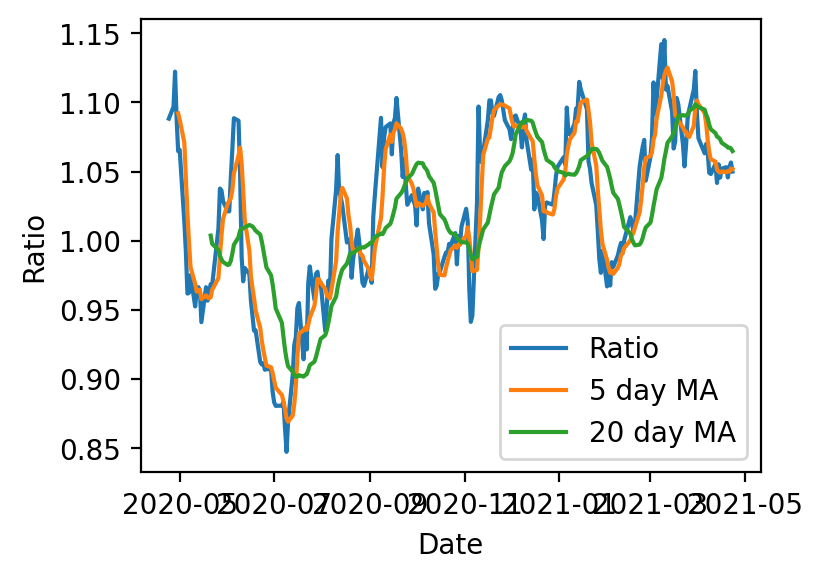

In [ ]:
figure(figsize=(4,3), dpi=200)
ratio_mavg_5 = ratio1.rolling(window=5).mean()
ratio_mavg_20 = ratio1.rolling(window=20).mean()
std_20 = ratio1.rolling(window=20).std()

plt.plot(ratio1.index, ratio1.values)
plt.plot(ratio_mavg_5.index, ratio_mavg_5.values)
plt.plot(ratio_mavg_20.index, ratio_mavg_20.values)
plt.legend(['Ratio', '5 day MA', '20 day MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

Below, I am going to calculate the z-score using the moving averages and the standard deviation

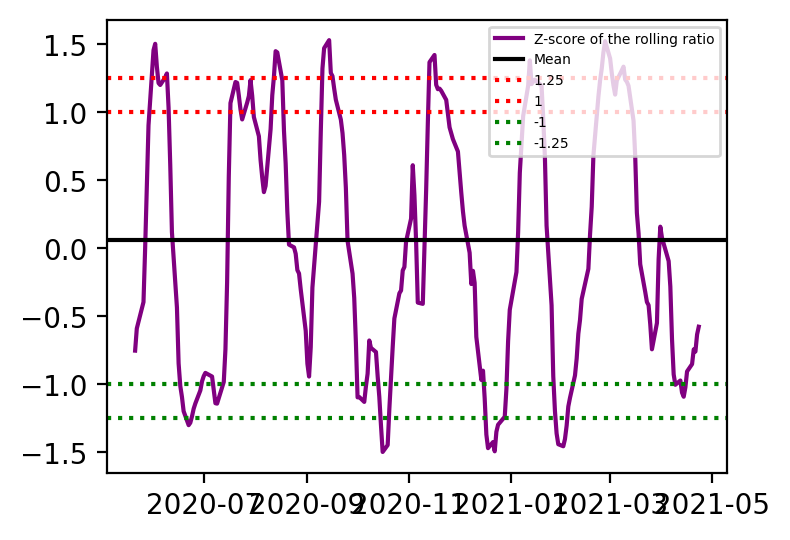

In [ ]:
#z score of these moving averages (5 & 20 days)
figure(figsize=(4,3), dpi=200)
zscore_20_5 = (ratio_mavg_5 - ratio_mavg_20)/std_20
plt.plot(zscore_20_5, color='purple')
plt.axhline(zscore.mean(), color='black')
plt.axhline(1, color='red', linestyle='dotted')
plt.axhline(1.25, color='red', linestyle='dotted')
plt.axhline(-1, color='green', linestyle='dotted')
plt.axhline(-1.25, color='green', linestyle='dotted')

plt.legend(['Z-score of the rolling ratio', 'Mean','1.25', '1', '-1', '-1.25'], loc='upper right', prop={'size': 5})

plt.show()

Finally, let us create a plot of where we would like to buy/ sell... a plot of trade opportunities

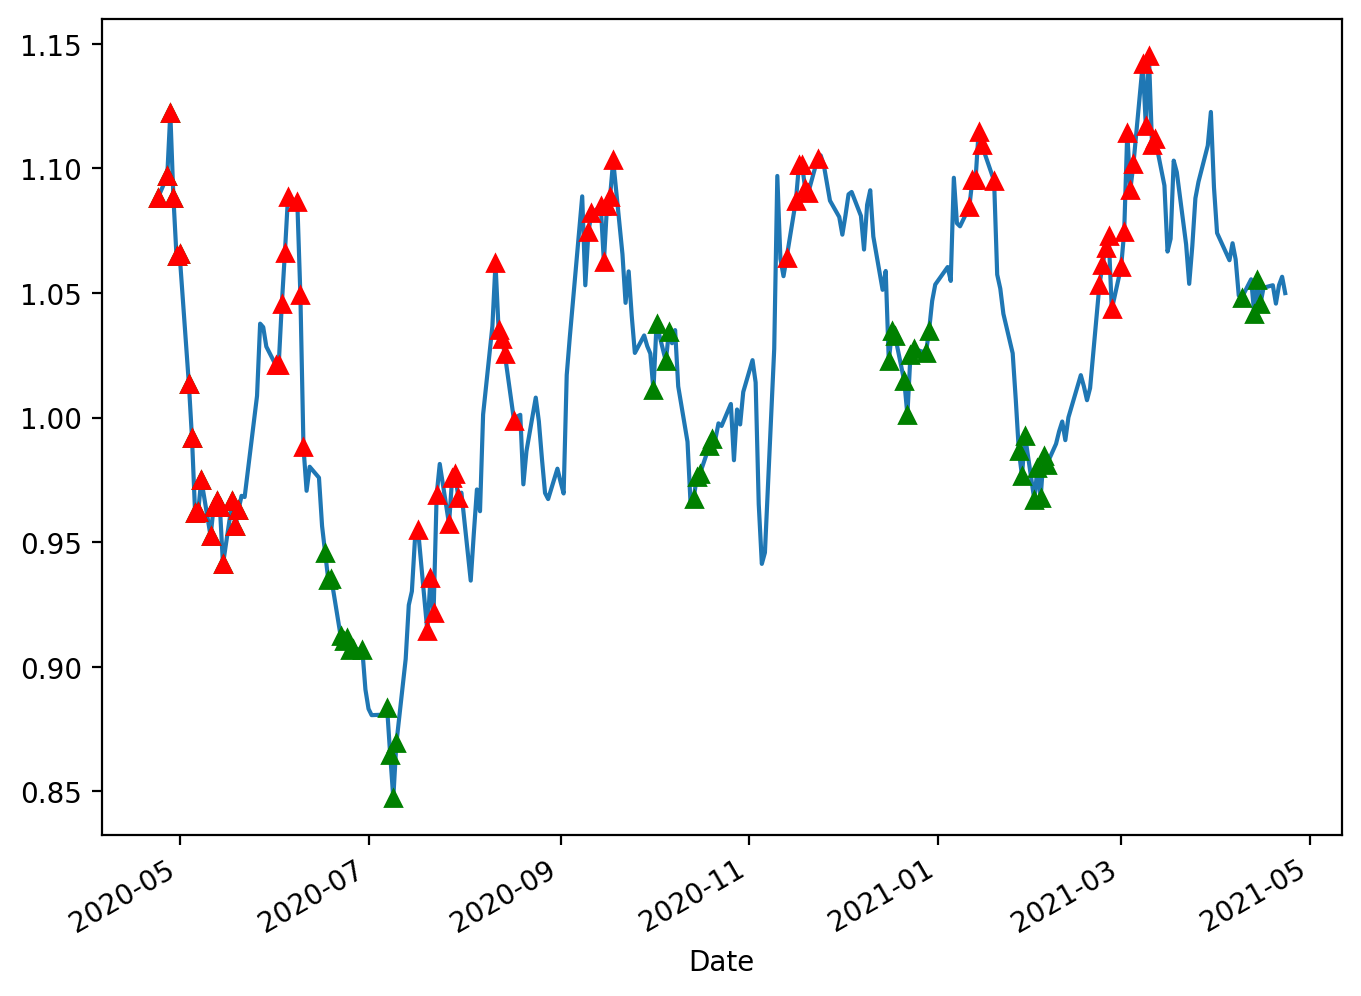

In [ ]:
figure(figsize=(8,6), dpi=200)
ratio1.plot()

buy = ratio1.copy()
sell = ratio1.copy()

#change the values in the dataframes in the following way...

#if the value of the rolling value Z-score (zscore_20_5) is above -1... do not buy and set value to 0 for that point
#the value of the 'buy' DF remains the same

#if the value if the rolling Z-score (zscore_20_5) is below 1... do not sell and set value of the DF to 0 for that point
#the value of the 'sell' DF remains the same

buy[zscore_20_5 > -1] = 0 #boolean
buy = buy.replace(0 , np.nan)

sell[zscore_20_5 < 1] = 0
sell = sell.replace(0, np.nan)

buy.plot(color='green', linestyle='None', marker='^')
sell.plot(color='red', linestyle='None', marker='^')

#Pair Selection function



First, I would like to select the pairs that are most correlated using the simple .corr() function. This method is appropriate for this level of analysis. However, more advanced methods will be explored in the future.

The function below returns a DataFrame containing the highest correlated pairs first. Only keep the top 20 highly correlated stocks in this DataFrame.

##Matrix correlation (perhaps not necessary step, for visual purposes only)

In [ ]:
#function takes a dataframe 'df' with various stock price timeseries over certain time frame
#finds correlation matrix of top 20 stock pairs in the sample
#returns highest correlated pairs with labels in a DataFrame

def matrix_correlation(df): 
  df_corr = df.corr()
  high_corr = df_corr[df_corr < 1].unstack().transpose().sort_values(ascending=False).drop_duplicates()
  high_corr = high_corr.head(20)
  high_corr = high_corr.to_frame() #turn pd.Series into pd.DataFrame
  high_corr = high_corr.reset_index()
  high_corr.columns = ['Stock 1', 'Stock 2', 'Correlation Value']

  return high_corr

The function Cointegration below takes in a Dataframe containing stock prices from different stocks over a certain time period. It calls the matrix_correlation(df) function to obtain the highest correlated stock pairs, and performs an Augmented Dickey-Fuller test on both the spread and ratio of every pair. Only the pairs whose ratio or spread have a lower p-value than the input p_threshold value are kept in the DataFrame returned by the function. There are no duplicates as those have been removed within the matrix_correlation function.

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller

def Cointegration(df, p_threshold): #takes in DataFrame with stock prices (using get_Historical_Data) and outputs DataFrame with cointegrated stock pairs
  df_corr = matrix_correlation(df)
  n = df_corr.shape[0]
  dup_df_corr = df_corr.copy() #make a copy of high correlation matrix I modify and return
  
  for i in range(n):
      string1 = df_corr.iloc[i,0]
      string2 = df_corr.iloc[i,1]
      stock_1 = get_Historical_Data([string1]).to_numpy()
      stock_2 = get_Historical_Data([string2]).to_numpy()
      spread = stock_1 - stock_2
      spread = spread.squeeze()
      ratio = stock_1 / stock_2
      ratio = ratio.squeeze()
      spread_ADF = adfuller(spread) #ADF test spread
      ratio_ADF = adfuller(ratio) #ADF test ratio

      if (spread_ADF[1] < p_threshold): #if first test passes, keep the row and do nothing to copy of correlation matrix
        pass
      elif (ratio_ADF[1] > p_threshold): #if first test fails AND second test fails, delete current row i
        dup_df_corr.drop([i], axis=0, inplace=True)
  

  #return remaining, modified DataFrame d_corr that only contains highly correlated pairs + successfully passed the test
  return dup_df_corr

a = Cointegration(d, 0.05)
print(a)

The following function will plot:



*   The ratio between two cointegrated pairs and the mean of the ratio
*   The Z-Score



In [ ]:
#function that plots the following ratio with the mean for each pair of stocks
#e.g ratio (SPY / GOOG)

def plot_ratio(df): #takes as input dataframe... of cointegrated stock pairs (def Cointegration output)
  n = df.shape[0]
  for i in range(n):
    plt.subplot(2,1,i+1)
    string1 = df.iloc[i,0]
    string2 = df.iloc[i,1]
    stock_1 = get_Historical_Data([string1]).to_numpy()
    stock_2 = get_Historical_Data([string2]).to_numpy()
    ratio = (stock_1 / stock_2)
    plt.plot(ratio, color='red')
    plt.axhline(ratio.mean())
    plt.legend(loc='best')


a = Cointegration(d, 0.05)
plot_ratio(a) #plot cointegrated pairs

In [ ]:
#function that plots the z-score of the mean

def plot_zscore(df):
  n = df.shape[0]
  for i in range(n):
    plt.subplot(2,1,i+1)
    string1 = df.iloc[i,0] # type - string
    string2 = df.iloc[i,1]
    stock_1 = get_Historical_Data([string1]) # type - DataFrame
    stock_2 = get_Historical_Data([string2])
    ratio = stock_1 / stock_2
    ratio_mavg_5 = ratio.rolling(window=5).mean() #5 day MA (DataFrame)
    ratio_mavg_20 = ratio.rolling(window=20).mean() #20 day MA
    std_20 = ratio.rolling(window=20).std() #STD of the 20 day MA
    zscore_20_5 = (ratio_mavg_5 - ratio_mavg_20) / std_20
    plt.plot(zscore_20_5, color='purple')

a = Cointegration(d, 0.05)
plot_zscore(a)

In the final part, I will attempt to simulate this trading strategy.

I will also take trading fees into account. 